In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Phân tích mức tiêu hao nhiên liệu

## 1. ĐỌC DỮ LIỆU

Dữ liệu `mpg.csv` gồm các thông tin như sau:

- **mpg**: Miles/(US) gallon số gallon xăng trên 1 dặm
- **cylinders:** số lượng xilanh
- **displacement:**  Displacement/ dung tích xilanh (cu.in / $inches^3$)
- **horsepower:** công suất theo mã lực
- **weight:** trọng lượng (pound)
- **acceleration:** Gia tốc
- **model_year:** Năm sản xuất
- **origin:** Xuất xứ
- **name:** Tên dòng xe


In [2]:
mpg = pd.read_csv('./Downloads/midterm-practice/mpg.csv')

## 2. TÌM HIỂU DỮ LIỆU

### 2.1 Kiểm tra có dòng nào không có dữ liệu?

In [3]:
mpg.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


### 2.2 Xóa các dòng không có dữ liệu


In [4]:
mpg = mpg.dropna(how='any',axis=0) 
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### 2.3 Tìm trung binh, trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'

In [5]:
mpg['cylinders'].mean(), mpg['cylinders'].median()

(5.471938775510204, 4.0)

In [6]:
mpg['horsepower'].mean(), mpg['horsepower'].median()

(104.46938775510205, 93.5)

In [7]:
mpg['weight'].mean(), mpg['horsepower'].median()

(2977.5841836734694, 93.5)

### 2.4 Tìm miền giá trị và miền phân vị của thuộc tính 'mpg'

In [8]:
mpg['mpg'].max() - mpg['mpg'].min()

37.6

In [9]:
mpg['mpg'].quantile(0.6)

25.0

## 3. SO SÁNH MỨC TIÊU HAO NHIÊN LIỆU TRUNG BÌNH CỦA CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

So sánh mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ, Nhật và Châu Âu

In [10]:
mpg.groupby('origin')['mpg'].mean()

origin
europe    27.602941
japan     30.450633
usa       20.033469
Name: mpg, dtype: float64

## 4. VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE

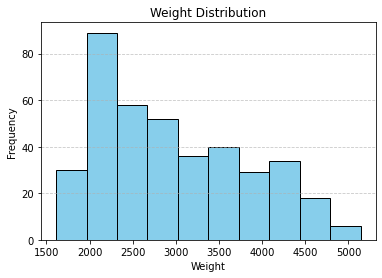

In [11]:
plt.hist(mpg["weight"], bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Weight Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## 5. TÍNH TỶ LỆ CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

In [12]:
mpg.groupby("origin")['name'].value_counts()/len(mpg.groupby("origin"))

origin  name                 
europe  peugeot 504              1.333333
        volkswagen dasher        1.000000
        audi 100ls               0.666667
        fiat 128                 0.666667
        opel 1900                0.666667
                                   ...   
usa     pontiac lemans v6        0.333333
        pontiac phoenix lj       0.333333
        pontiac safari (sw)      0.333333
        pontiac sunbird coupe    0.333333
        pontiac ventura sj       0.333333
Name: name, Length: 301, dtype: float64

## 6. VẼ BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80

Lưu ý: Các dòng xe thập niên 70 (1970 - 1979), thập niên 80 (1980 - 1989)

## 7. KHẢO SÁT MỨC TIÊU HAO NHIÊN LIỆU

### 7.1 Với số lượng xi lanh

Thử vẽ bằng đồ thị scatter plot.

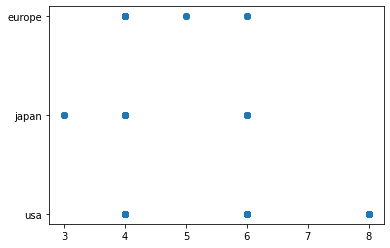

In [13]:
plt.scatter(mpg['cylinders'],mpg['origin'])

plt.show()

### 7.2 Với công suất theo mã lực

In [16]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


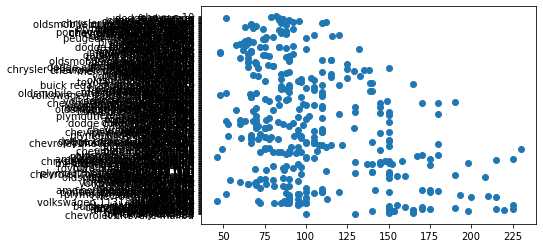

In [18]:
plt.scatter(mpg['horsepower'],mpg['name'])

plt.show()

### 7.3 Với gia tốc

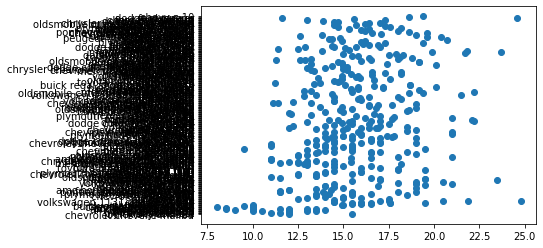

In [20]:
plt.scatter(mpg['acceleration'],mpg['name'])
plt.show()

### 7.4 Với năm sản xuất

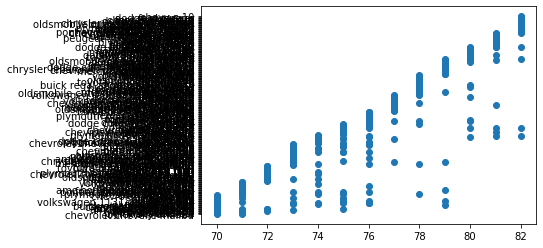

In [21]:
plt.scatter(mpg['model_year'],mpg['name'])

plt.show()